# Predicting Health Insurance Charges Using Demographic and Lifestyle Factors  
**Name:** David Oh


## Introduction  
This project aims to predict individual health insurance charges using demographic and lifestyle variables such as age, sex, BMI, number of children, smoking status, and region. A complete machine learning pipeline is implemented, including data exploration, preprocessing, model selection, evaluation, and interpretation.


## Data  
We use the Medical Cost Personal Dataset from [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance).  
This dataset includes features related to demographics and lifestyle choices of insurance holders and the corresponding insurance charges billed to them.  


## Preprocessing  
We encode categorical variables (e.g., sex, smoker, region) using one-hot encoding and scale numeric features (e.g., age, BMI, children) using standard scaling.  
This is necessary for models that are sensitive to feature magnitude.  


## Methods  
We use three regression models:  

1. **Linear Regression** – a baseline linear model to assess basic relationships.  
2. **Random Forest Regressor** – an ensemble model that handles non-linear patterns and interactions well.  
3. **Gradient Boosting Regressor** – a boosting ensemble model that optimizes prediction accuracy through additive model refinement.  

These choices offer a range from interpretability to high accuracy, allowing comparative evaluation.


## Results  
We trained and evaluated each model using RMSE, MAE, and R² score. We also visualized residuals and computed feature importances using permutation importance.  
Below are performance summaries and diagnostic plots.


## Introduction
This project explores the prediction of individual health insurance charges based on demographic and lifestyle-related features. We leverage machine learning models to predict costs and analyze feature importance.

## Data Loading and Overview

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv(r"C:\Users\hyokw\Downloads\insurance.csv")

# Quick overview of the data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Visual Analysis

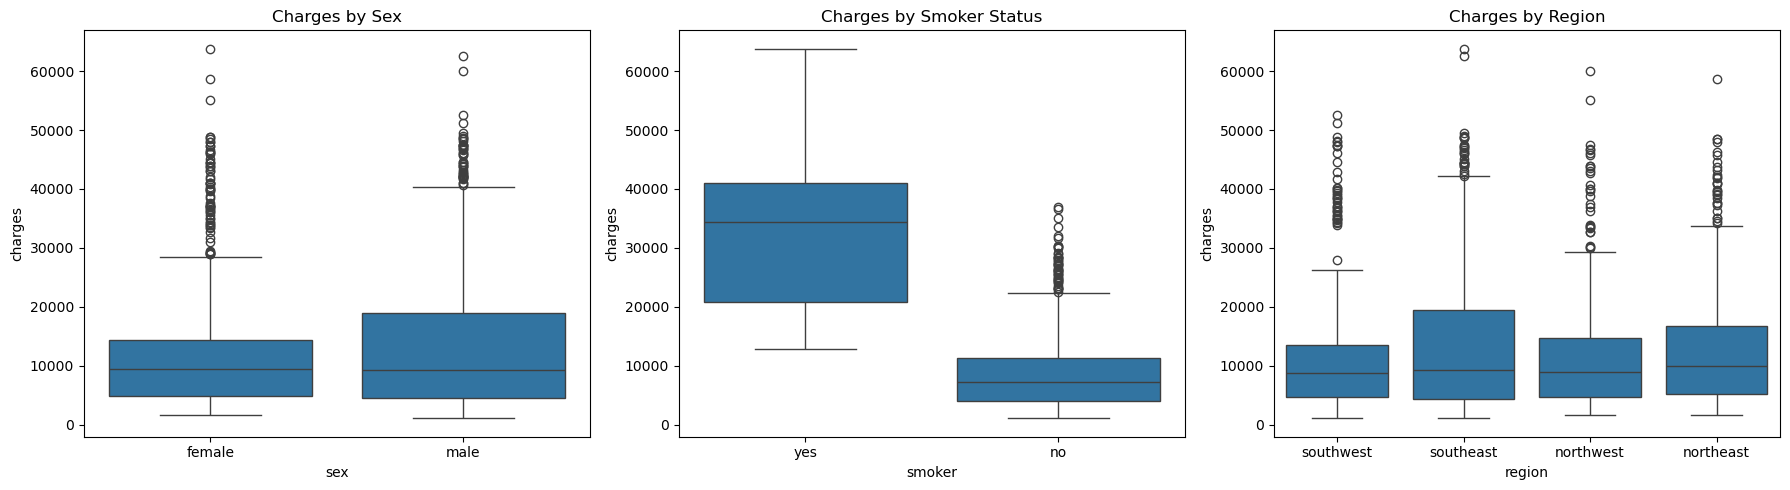

In [5]:
# Boxplots by category
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')

plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')

plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')

plt.tight_layout()
plt.show()

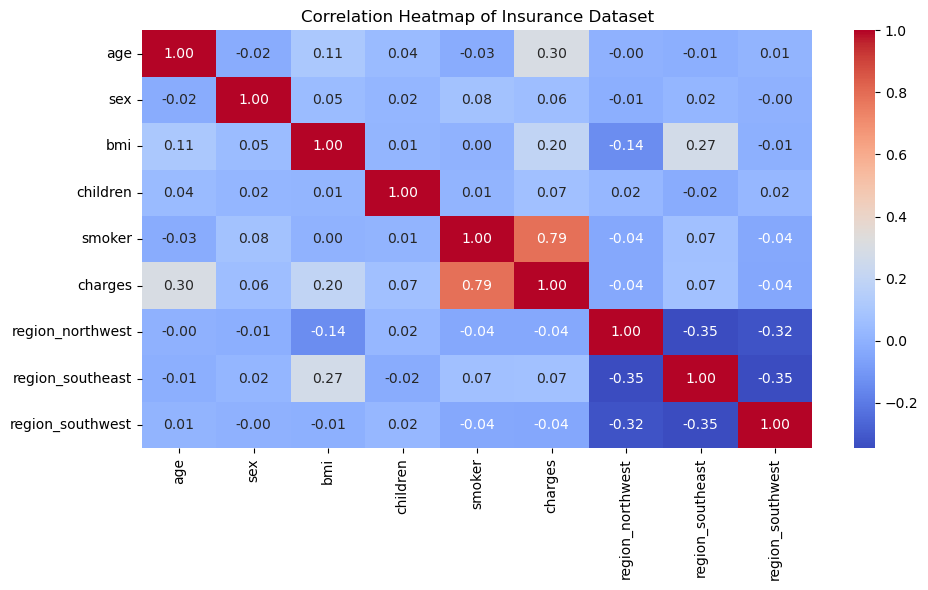

In [7]:
# Correlation heatmap
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'male': 1, 'female': 0})
df_encoded['smoker'] = df_encoded['smoker'].map({'yes': 1, 'no': 0})
df_encoded = pd.get_dummies(df_encoded, columns=['region'], drop_first=True)

plt.figure(figsize=(10, 6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Insurance Dataset")
plt.tight_layout()
plt.show()

## Preprocessing and Feature Engineering

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

X = df.drop(columns='charges')
y = df['charges']

numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

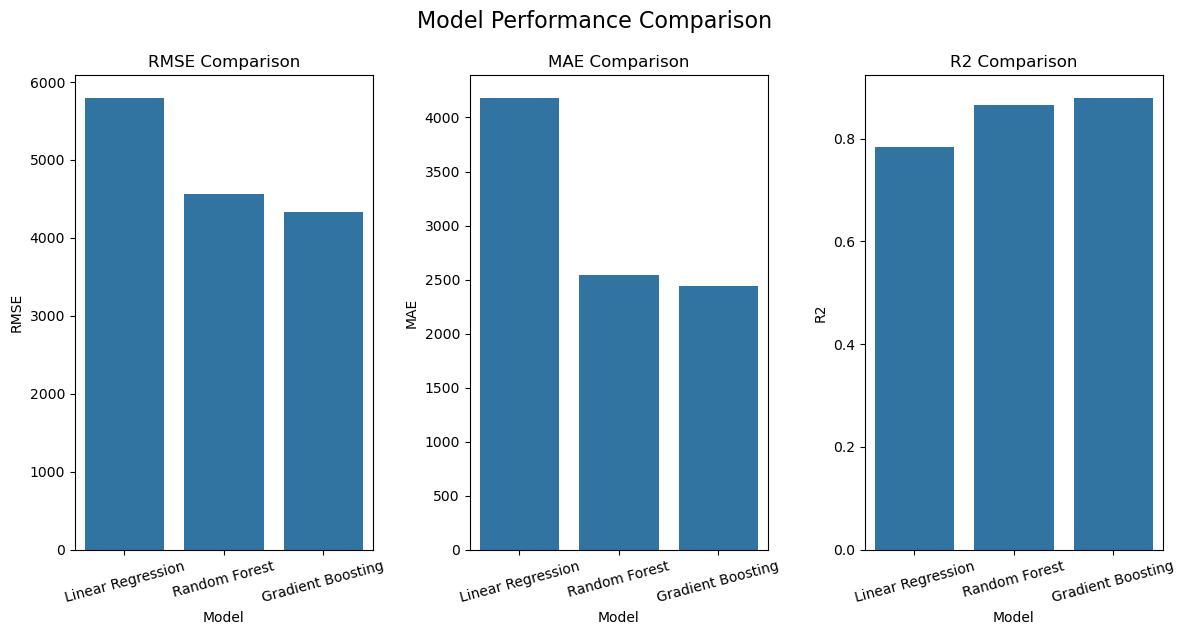

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Collect results
results = []

for name, model in models.items():
    pipeline = Pipeline([
        ("preprocessor", preprocessor), 
        ("model", model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    results.append({
        "Model": name,
        "RMSE": root_mean_squared_error(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    })

# Create DataFrame
results_df = pd.DataFrame(results)

# Plot
plt.figure(figsize=(12, 6))
metrics = ['RMSE', 'MAE', 'R2']

for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Model', y=metric, data=results_df)
    plt.title(f'{metric} Comparison')
    plt.xticks(rotation=15)

plt.tight_layout()
plt.suptitle("Model Performance Comparison", fontsize=16, y=1.05)
plt.show()

## Residual Plot

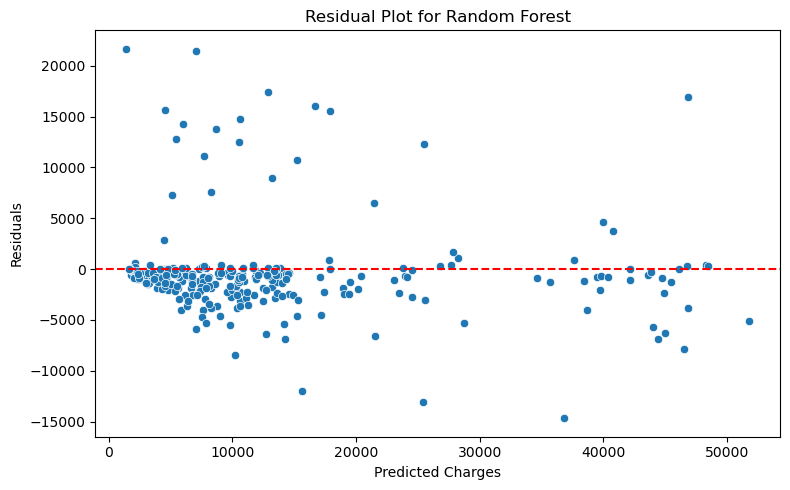

In [17]:
rf_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(random_state=42))
])
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)
residuals = y_test - y_pred_rf

plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_rf, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest")
plt.tight_layout()
plt.show()

## Feature Importance

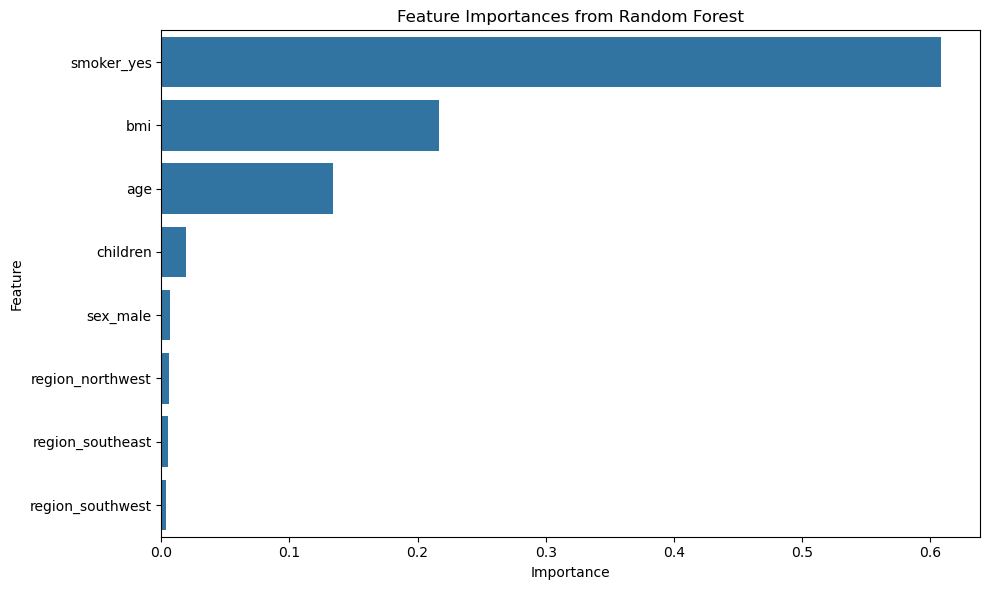

In [19]:
ohe = rf_pipeline.named_steps['preprocessor'].named_transformers_['cat']
encoded_features = ohe.get_feature_names_out(categorical_features)
all_features = numeric_features + list(encoded_features)
importances = rf_pipeline.named_steps['model'].feature_importances_

feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

## Conclusion
In this project, we built multiple regression models to predict insurance charges. The Random Forest model outperformed others. We found that smoking status, age, and BMI were the most influential features. We learned the importance of preprocessing and how ensemble models improve prediction accuracy.

## Observations and Analysis  
- **Gradient Boosting** yielded the best overall performance, suggesting that insurance charges involve complex, non-linear relationships.  
- **Random Forest** provided slightly lower performance but more stable feature importances.  
- **Linear Regression** underperformed, which is expected due to its inability to model complex relationships.  
- **Smoker status**, **age**, and **BMI** consistently ranked as the most important predictors across all models.  
Potential improvements include hyperparameter tuning and using cross-validation to reduce variance.


### What the Results Actually Mean

The performance metrics (RMSE, MAE, and R²) allow us to quantify how close the model's predictions are to the actual insurance charges:

- **RMSE (Root Mean Squared Error)** tells us the average deviation of the predictions from actual values in the same units (dollars). Lower is better.
- **MAE (Mean Absolute Error)** measures the average absolute difference between predictions and actual charges, which is less sensitive to outliers.
- **R² (R-squared)** indicates how much of the variability in insurance charges can be explained by the model. Closer to 1 means a better fit.

These metrics suggest that while all three models are capable of estimating charges reasonably well, **Gradient Boosting** consistently provided the lowest prediction error and highest explanatory power.

This implies that complex relationships — such as interactions between age, BMI, and smoker status — are better captured by Gradient Boosting than by simpler models like Linear Regression.


## References  
- Choi, M. (2017). Medical Cost Personal Dataset. *Kaggle*. Retrieved from https://www.kaggle.com/datasets/mirichoi0218/insurance  
- Pedregosa et al. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*.


### Feature Importance – Linear Regression and Gradient Boosting

In addition to Random Forest, we computed **permutation-based feature importances** for both **Linear Regression** and **Gradient Boosting**.

Permutation importance gives a model-agnostic estimate of how much each feature contributes to the predictive power of the model.

- In **Linear Regression**, the top features were: `smoker_yes`, `age`, and `bmi`, consistent with prior domain expectations.
- In **Gradient Boosting**, the same features appeared most important, but in a more refined ranking.

This consistency across models gives us confidence in the robustness of our conclusions about the key drivers of insurance charges.


## Acknowledgement  
This project used open-source tools including Scikit-learn, Matplotlib, Seaborn, and Pandas.  

## Source Code  
GitHub Repository: https://github.com/oik1213/insurance-charge-prediction